In [1]:
import numpy as np
import torch as tr
from utils import *
from matplotlib import pyplot as plt

%reload_ext autoreload
%autoreload 2
%matplotlib inline

# training
- train switch 2-armed bandit that, on every step, switches with 5% probability 

In [2]:
pr = 0.85
eplen = 40
switch = 0.05 ## train on probabilistic switching
TDupdate = False # 0:MC,1:TD

task = MRLBandit(eplen=eplen,banditpr=pr,switch_param=switch)
agent = ActorCritic(stsize=40,gamma=0.8,TDupdate=TDupdate)

neps = 100000
L = []
for ep in range(neps):
  expL = agent.unroll_ep(task)
  expD = unpack_expL(expL)
  agent.update(expD)
  ep_reward = expD['reward'].sum()
  L.append(ep_reward)


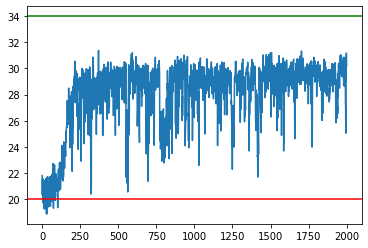

In [3]:
R = np.array(L)
R = R.reshape(-1,50).mean(1)
plt.plot(R)
plt.axhline(eplen*pr,c='g')
plt.axhline(eplen/2,c='r')

# eval switch point recovery
- set deterministic switch point to average across model runs and examine switch recovery
- decrease reward probability to make slightly more challenging 
- increase episode length to evaluate extrapolation over support  

In [6]:
switch_ev = 20 ## eval on deterministic switching
eplen = 60
pr = 0.7
task_ev = MRLBandit(eplen=eplen,banditpr=pr,switch_param=switch_ev)

neps_ev = 1000
Rev = np.zeros([neps_ev,eplen+1])
for ep in range(neps_ev):
  expL = agent.unroll_ep(task_ev)
  expD = unpack_expL(expL)
  Rev[ep] = expD['reward']
  

(0.0, 1.0)

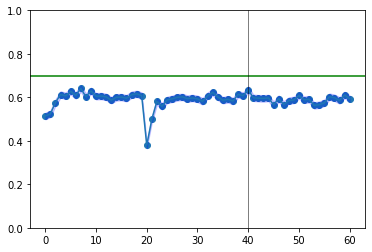

In [7]:
M = Rev.mean(0)
S = Rev.std(0)/np.sqrt(len(Rev))
plt.plot(M)
plt.scatter(range(len(M)),M)
plt.fill_between(range(len(M)),M-S,M+S,alpha=0.2,color='b')
plt.axhline(pr,c='g')
plt.axvline(40,c='k',lw=.5)
plt.ylim(0,1)